In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Data exploration

For my approach I will first consider two approaches:
- the **full case** analysis, before any value imputation or droping values.
- the **imputed case**, I will try to gain some information and justification whether a variable should be imputed or not. 

Personaly I think only variables where there are many zero cases should be imputed with zeros values. If this data was scanned from a financial raport then the value missingnes is likely not missing at random, it might be perfectly logical to not fill any information about liabilities if we don't have any liability.

Also dropping possible "outliers", I will possibly consider dropping if and only its insanely unexpected value given that we have over 150k observations.

In [120]:
df = pd.read_csv('data/credit_sample.csv')
df['obs_date'] = pd.to_datetime(df['obs_date'])
df.head(2)

,ID,obs_date,Var_01,Var_02,Var_03,Var_04,Var_05,Var_06,Var_07,Var_08,...,Var_31,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,default
0,16680574,2015-03-31,1.113874e+07,1.376687e+07,5.088808e+04,1.381694,1.480514,7.173578e+05,0.080700,1.261532e+06,...,1.781196,4.413310e+06,1.830489,1.703930e+06,0.742622,6.391379e+06,3.229780,2.983519e+06,3.077087e+06,0
1,96135545,2015-12-31,3.162025e+10,5.264251e+10,1.191007e+10,1.349057,-0.240472,1.696850e+09,0.463526,2.699133e+10,...,1.175688,-1.129475e+10,-0.225773,2.569705e+10,0.488350,-1.129475e+10,-0.393707,2.825408e+09,8.181468e+09,1


## Preprocessing variables

- Each observation is a client, however there are large amounts of clients that occur more than once in the dataset. I will create a categorical feature following this pattern:

```
ID OBS_DATE OBS_COUNT
ID01 DATE1 0
ID01 DATE2 1
ID01 DATE3 2
ID02 DATE1 0
ID01 DATE1 0
ID01 DATE2 1
```
- also the group of obervations with 6+ years is the smallest I group them toogether

In [121]:
df = df.sort_values(by=['ID', 'obs_date'])
df = df.assign(obs_count= df.iloc[:, :2].groupby(['ID']).cumcount())
df['obs_count'] = np.where(df['obs_count']>=6, 6, df['obs_count'])
df.head(10)

,ID,obs_date,Var_01,Var_02,Var_03,Var_04,Var_05,Var_06,Var_07,Var_08,...,Var_32,Var_33,Var_34,Var_35,Var_36,Var_37,Var_38,Var_39,default,obs_count
15112,1574,2015-12-31,1.459814e+05,2.084565e+06,121857.381239,1.340909,0.314156,618.565387,0.766667,170105.481425,...,5.981527e+05,2.167220,1.177748e+06,0.435015,5.981527e+05,3.503623,2.474262e+03,3.711392e+04,0,0
15110,1574,2016-12-31,2.430558e+05,2.667237e+06,128323.855871,1.775559,0.328272,411.619273,0.760961,207691.324722,...,6.814891e+05,2.533756,1.606237e+06,0.397790,6.814891e+05,3.274769,1.313236e+04,1.061660e+05,0,1
15109,1574,2017-12-31,1.133773e+05,2.470817e+06,95445.639441,1.081923,0.191255,1513.054904,1.000000,236928.021420,...,4.466381e+05,1.333738,1.662793e+06,0.327027,4.466381e+05,1.873159,1.092604e+04,8.584896e+03,0,2
15108,1574,2018-12-31,1.970604e+05,3.136429e+06,156790.021348,2.051041,0.175084,3074.958899,0.730127,218898.858812,...,4.384314e+05,1.755347,2.225452e+06,0.290450,4.384314e+05,1.975149,1.578360e+03,1.009822e+05,0,3
15111,1574,2019-12-31,1.766260e+05,2.413088e+06,154848.635273,1.096836,0.180196,2177.674556,0.652214,127950.713298,...,4.785634e+05,2.159835,1.559727e+06,0.353639,4.785634e+05,3.677625,1.799459e+03,1.559375e+04,0,4
18475,2897,2015-12-31,1.761789e+06,2.460782e+06,232111.973761,1.444174,-0.009236,49424.564797,0.043896,254535.841116,...,-1.183384e+04,-0.027359,9.004163e+05,0.634093,-1.183384e+04,-0.038932,9.806356e+05,5.418600e+05,0,0
18478,2897,2016-12-31,1.941927e+06,2.495040e+06,84412.073791,1.426545,0.211273,47343.737080,0.029751,212427.230633,...,2.590918e+05,0.678711,8.345095e+05,0.665533,2.590918e+05,0.997386,1.016426e+06,5.806472e+05,0,1
18474,2897,2017-12-31,3.433241e+06,4.005498e+06,157263.242272,1.346304,-0.007495,59862.877370,0.032915,362392.088068,...,-1.163245e+04,-0.022235,1.252749e+06,0.687243,-1.163245e+04,-0.027548,2.386209e+06,8.831185e+05,0,2
18479,2897,2018-12-31,2.688058e+06,4.052157e+06,1274.778498,0.994575,0.229241,56579.658322,0.021069,206862.444632,...,3.976444e+05,1.097646,1.261410e+06,0.688707,3.976444e+05,1.509418,2.217368e+06,-1.466250e+04,0,3
18476,2897,2019-12-31,4.221342e+06,5.614209e+06,259298.998047,1.310462,0.922361,75339.783673,0.024392,280924.079633,...,1.536651e+06,3.771395,1.456709e+06,0.740532,1.536651e+06,4.313239,2.073969e+06,1.000079e+06,0,4


In [122]:
df['obs_count'].value_counts()

0    46069
1    40378
2    22400
3    15963
4    11492
5     8004
6     4623
Name: obs_count, dtype: int64

## Missing values analysis

Lets first take a look at variables with largest amount of missing values

In [123]:
df.isna().sum().sort_values(ascending=False)

Var_20       14299
Var_38       13081
Var_06       12285
Var_28        7816
Var_26        4489
Var_03        4347
Var_17        2140
Var_05        1408
Var_33        1326
Var_37        1324
Var_32        1290
Var_36        1288
Var_04        1224
Var_25        1224
Var_21        1039
Var_35         647
Var_01         372
Var_16         372
Var_39         283
Var_13         178
Var_12          61
Var_27          54
Var_10          47
Var_34          47
Var_31          42
Var_30          19
Var_19          15
Var_11          15
Var_29           0
default          0
ID               0
Var_24           0
Var_23           0
Var_22           0
obs_date         0
Var_18           0
Var_15           0
Var_14           0
Var_09           0
Var_08           0
Var_07           0
Var_02           0
obs_count        0
dtype: int64


So an interesting fact about variables - Var_20, Var_38, Var_06, Var_28, Var_26, Var_03, Var_17, Var_05, Var_33 - is that they mostly refer to assets or depts. This is something I was mostly expecting as such missing fields from scanned documents, by invidiualy chaecking these variables it can be found that there was alot of exactly 0 entries too.

In most variable there also happen to occur some large values relating to high depts, I wont drop them since these seem like real infromations.

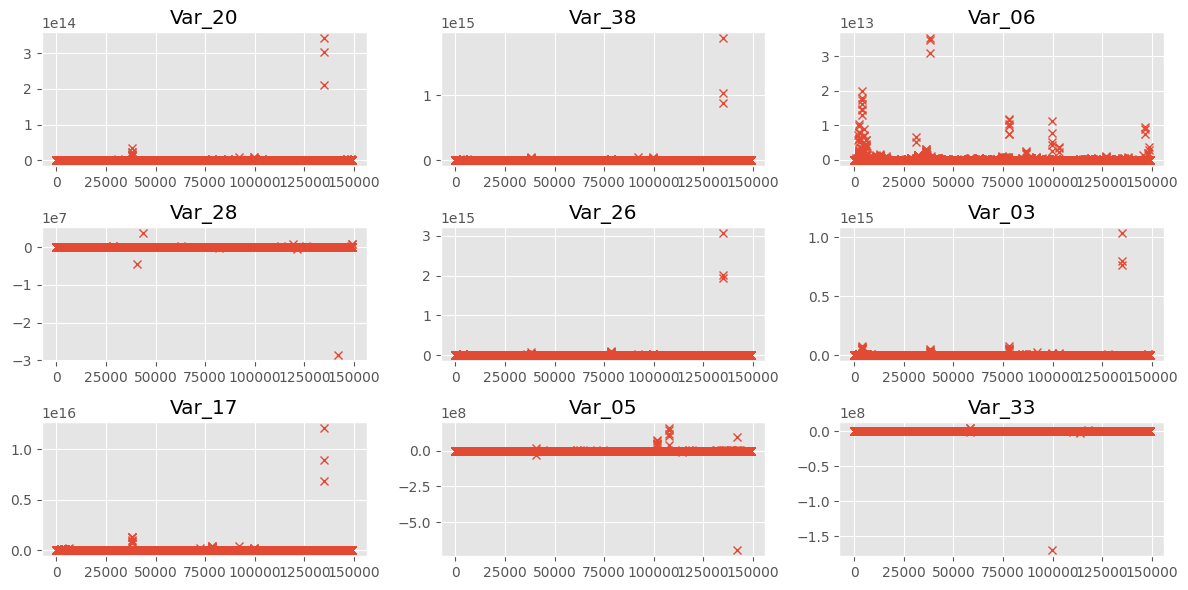

In [124]:
fig, ax = plt.subplots(3, 3, figsize=(12, 6))
ax=ax.ravel()

vars_ = ['Var_20', 'Var_38', 'Var_06', 'Var_28', 'Var_26', 'Var_03', 'Var_17', 'Var_05', 'Var_33']
df_imputed = df.copy()

for i, x in enumerate(vars_):
    df_imputed[x] = df_imputed[x].fillna(0)
    ax[i].plot(df_imputed[x], 'x')
    ax[i].set_title(f'{x}')

fig.tight_layout()

## Standarizing and one-hot encoding

Procedure for value standarization:
- because we are dealing with very large values we want to take the logarithms of them
- additionaly after checking the ranges of values I have decided to divide all values by a milion before taking the logarithmic in all columns
- because there are at the same time large positive and negative values I preprocess values in each column by adding absolute value of smallest observation and add 1 to avoid problem with logarithm of 0
- after all of this that standard z standarization
- the obs_count variable is processed using a one-hot encoding procedure

I will use this full_case without any further data processing to gain a baseline of what can we achive by simply applying random forest for feature selection and building a logistic regression out of them. Note that this approach drops 1/3 of observations.

In [125]:
def preprocess_data(df):
    # standarizing only columns Var01-39
    for col in [i for i in df.columns if i.startswith('Var_')]:
        df[col] = df[col] / 10e6
        df[col] = df[col] + abs(df[col].min()) + 1
        df[col] = np.log(df[col])
        df[col] = (df[col] - df[col].mean()) / df[col].std()

    # one hot encoding
    dummies = pd.get_dummies(df['obs_count'], prefix='obs_count_')
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(['obs_count'], axis=1)
    
    return df

full_case = df.dropna().reset_index().drop(columns='index')
full_case = (full_case.pipe(preprocess_data))
full_case.to_csv('data/full_case.csv')
    
len(full_case)

108708

In comparison the imputed dataset drop around 2000 observations

In [126]:
df_imputed = df_imputed.dropna().reset_index().drop(columns='index')
df_imputed = (df_imputed.pipe(preprocess_data))
df_imputed.to_csv('data/df_imputed.csv')
len(df_imputed)

146704

In [127]:
len(df)

148929

For the modeling refer to the modeling.ipynb